In [1]:
import numpy as np
import scipy.special as scisp
import scipy.integrate as integ
import mpmath
from scipy import constants as const
import Green_functions as gr
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
sim = gr.simulation()


%matplotlib qt
sim.GYSRLSCalcSquare( J1=-0.0296,J2=0,alpha=0,delta=0.0000287,m=20.956,pf=0.274,dynes=5e-6,Epx=400,x=(0,157),xypx=100,YSRenergy=0.000020947026906146,dir='110')




1 cycle: 0.0 minutes --- Total time: 0.12 seconds


In [7]:
x=np.linspace(-3,3,100)
y=[]

for i in x:
    sim.G(1,1,i+0.01j,1,1,1,0)
    y.append(-np.trace(np.imag(sim.G0)))
plt.plot(x,y)

C:\Users\jonor\AppData\Local\Temp/ipykernel_10404/4274449038.py:12: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y.append(F(np.complex(i,0.01),1,0.5,0.5))


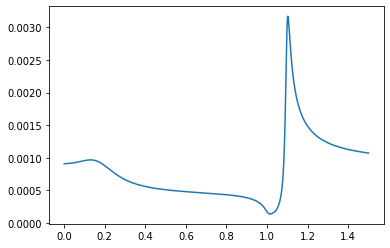

In [41]:
def F(E,delta,alpha,eta):
    O=np.sqrt(E**2-delta**2)
    a=4*np.divide(E-O,E+O)*E**2
    u=1+np.divide(E-O,E+O)*eta+alpha*np.divide(2*O,E+O)*(1-eta)
    D=np.divide(a,u**2)
    return np.divide(2,np.pi*700)*np.real(np.divide(E,np.sqrt(E**2-D**2)))
    

x=np.linspace(0,1.5,1000)
y=[]
for i in x:
    y.append(F(np.complex(i,0.01),1,0.5,0.5))

plt.plot(x,y)

plt.show()



In [3]:
def F(E,delta,d,eta):
    E=E+1j*eta
    OS=np.sqrt(E**2-delta**2)
    a=d
    g=complex(0,1)*np.divide(E,OS)
    return np.abs(np.imag(np.divide(g*np.cos(a*np.abs(E))+np.sin(a*np.abs(E)),g*np.sin(a*np.abs(E))-np.cos(a*np.abs(E)))))

def fermi(E,T):
    kb=8.62E-2
    return np.divide(1,1+np.exp(np.divide(E,kb*T)))

def dynes(E,eta,delta):
    E=E+1j*eta
    return np.imag(E/np.sqrt(-E**2+delta**2))

def conv(V,delta,d,eta,T):
    E=np.linspace(-2*V,2*V,5000)
    return -np.trapz(dynes(E,eta,delta)*F(E+V,delta,d,2*eta)*(fermi(E+V,T)-fermi(E,T)),x=E)

x=np.linspace(-5,5,500)
y=[]
for i in x:
    y.append(conv(i,0.78,2,0.05,1))

plt.plot(x,np.abs(np.gradient(y)))
plt.show()

In [75]:
x=np.linspace(-5,5,500)

plt.plot(x,F(x,0.78,3,0.1))
plt.plot(x,dynes(x,0.1,0.78))
plt.show()


In [106]:
def Ff(E,x,delta,d,eta):
    E=E+1j*eta
    OS=np.sqrt(E**2-delta**2)
    kp=1000*np.sqrt(1+d*np.abs(E)/1000)
    km=1000*np.sqrt(1-d*np.abs(E)/1000)
    F=E/OS
    A=1j*F*np.cos(kp*x+km*d)-np.sin(kp*x+km*d)
    return np.abs(np.imag(np.divide(A,1j*F*np.sin(d*np.abs(E))-np.cos(d*np.abs(E)))))

x=np.linspace(-1,1,500)

plt.plot(x,Ff(x,-3,0.1,3,0.00001))
plt.show()


In [4]:
def H1(J1,J2,J12,Delta,t):
  a= np.kron(np.identity(8), [[J12/4, 0, 0, 0], [0, -J12/4, J12/2, 0], [0, J12/2, -J12/4,0], [0, 0, 0, J12/4]])
  b=np.kron(np.diag([1, 0]),np.kron( [[2*Delta, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, -2*Delta]], np.identity(4)) )
  c=np.kron(np.diag([0, 1]),np.kron(np.diag([1, 1, -1, -1]),np.diag([J1/4, J1/4, -J1/4, -J1/4])))
  d=np.kron(np.diag([0, 1]),np.kron( [[0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [J1/2, 0, 0, 0], [0, J1/2, 0, 0]]) )
  e=np.kron(np.diag([0, 1]), np.kron([[0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0]], [[0, 0, J1/2, 0], [0, 0, 0, J1/2], [0, 0, 0, 0], [0, 0, 0, 0]]))
  f=np.kron(np.diag([0, 1]),np.kron(np.diag([1, -1, 1, -1]), np.diag([J2/4, -J2/4, J2/4, -J2/4])) )
  g=np.kron(np.diag([0, 1]), np.kron([[0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0]], [[0, 0, 0, 0], [J2/2, 0, 0, 0], [0, 0, 0,0], [0, 0, J2/2, 0]]) )
  h=np.kron(np.diag([0, 1]), np.kron([[0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0]], [[0, J2/2, 0, 0], [0, 0, 0, 0], [0, 0, 0, J2/2], [0, 0, 0, 0]]) )
  i=np.kron([[0, 1], [1, 0]],np.kron([[0, t, 0, 0], [0, 0, -t, 0], [0, 0, t, 0], [0, -t, 0, 0]], np.identity(4)))

  return a+b+c+d+e+f+g+h+i

def H2(J1,J2,J12,Delta,t):
  a=np.kron(np.identity(8), [[J12/4, 0, 0, 0], [0, -J12/4, J12/2, 0], [0, J12/2, -J12/4, 0], [0, 0, 0, J12/4]]) 
  b=np.kron(np.identity(2),np.kron( np.diag([-Delta, Delta]), np.identity(8)) )
  c=np.kron(np.diag([1, 1, 0, 0]),np.kron( np.diag([1, -1]),  np.diag([J2/4, -J2/4, J2/4, -J2/4]))) 
  d=np.kron(np.diag([1, 1, 0, 0]), np.kron([[0, 0], [1, 0]], [[0, J2/2, 0, 0], [0, 0, 0, 0], [0, 0, 0, J2/2], [0, 0, 0, 0]]) )
  e=np.kron(np.diag([1, 1, 0, 0]),np.kron( [[0, 1], [0, 0]], [[0, 0, 0, 0], [J2/2, 0, 0, 0], [0, 0, 0, 0], [0, 0, J2/2, 0]]) )
  f=np.kron(np.diag([0, 0, 1, 1]),np.kron( np.diag([1, -1]), np.diag([J1/4, -J1/4, J1/4, -J1/4])) )
  g=np.kron(np.diag([0, 0, 1, 1]),np.kron( [[0, 0], [1, 0]], [[0, J1/2, 0, 0], [0, 0, 0, 0], [0, 0, 0, J1/2], [0, 0, 0, 0]]) )
  h=np.kron(np.diag([0, 0, 1, 1]),np.kron( [[0, 1], [0, 0]], [[0, 0, 0, 0], [J1/2, 0, 0, 0], [0, 0, 0, 0], [0, 0, J1/2, 0]]) )
  i=np.kron([[0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0,0]], np.kron(np.diag([t, -t]), np.identity(4)))
  
  return a+b+c+d+e+f+g+h+i



def eigh1(J1,J2,J12,Delta,t):
  return np.linalg.eigh(H1(J1,J2,J12,Delta,t))

def eigh2(J1,J2,J12,Delta,t):
  return np.linalg.eigh(H2(J1,J2,J12,Delta,t))

In [6]:
x=np.linspace(0,1,100)
J1_1=[]
J2_1=[]
J12_1=[]
t_1=[]
J1_2=[]
J2_2=[]
J12_2=[]
t_2=[]


cm = 1/2.54
f = plt.figure(figsize=(21*cm,15*cm))

for i in x:
    J1_1.append(eigh1(i,0,0,1,0)[0])
    J1_2.append(eigh2(i,0,0,1,0)[0])
for i in x:
    J2_1.append(eigh1(1,i,0,1,0)[0])
    J2_2.append(eigh2(1,i,0,1,0)[0])
for i in x:
    J12_1.append(eigh1(1,1,i,1,0)[0])
    J12_2.append(eigh2(1,1,i,1,0)[0])
for i in x:
    t_1.append(eigh1(1,1,1,1,i)[0])
    t_2.append(eigh2(1,1,1,1,i)[0])
J1_1=np.array(J1_1)
J2_1=np.array(J2_1)
J12_1=np.array(J12_1)
t_1=np.array(t_1)
J1_2=np.array(J1_2)
J2_2=np.array(J2_2)
J12_2=np.array(J12_2)
t_2=np.array(t_2)


ax = []

gs1 = GridSpec(1, 4,width_ratios=[1,1,1,1],wspace=0)
ax.append(f.add_subplot(gs1[0,0]))
ax.append(f.add_subplot(gs1[0,1]))
ax.append(f.add_subplot(gs1[0,2]))
ax.append(f.add_subplot(gs1[0,3]))
ax[1].yaxis.set_visible(False)
ax[2].yaxis.set_visible(False)
ax[3].yaxis.set_visible(False)

ax[1].xaxis.set_ticks_position('top')
ax[3].xaxis.set_ticks_position('top')
ax[0].set_xlabel('J1')
ax[1].set_xlabel('J2')
ax[2].set_xlabel('J12')
ax[3].set_xlabel('t')
ax[0].set_ylim(-3,3)
ax[1].set_ylim(-3,3)
ax[2].set_ylim(-3,3)
ax[3].set_ylim(-3,3)

for i in range(0,32):
    ax[0].plot(x,J1_1[:,i],color='C0')
    ax[0].plot(x,J1_2[:,i],color='C1')
    ax[1].plot(x,J2_1[:,i],color='C0')
    ax[1].plot(x,J2_2[:,i],color='C1')
    ax[2].plot(x,J12_1[:,i],color='C0')
    ax[2].plot(x,J12_2[:,i],color='C1')
    ax[3].plot(x,t_1[:,i],color='C0')
    ax[3].plot(x,t_2[:,i],color='C1')
plt.show()

In [60]:
np.concatenate((x,x),axis=None)


array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [3]:
def M(Del,D,J1,J2):
    Delta= [[Del, 0, 0, 0, 0, 0], [0, Del, 0, 0, 0, 0], [0, 0, Del, 0, 0, 0], [0, 0, 0, Del, 0, 0], [0, 0, 0, 0, Del, 0], [0, 0, 0, 0, 0, Del]]
    Spin= [[(25/4)*D, 0, 0, 0, 0, 0], [0, (9/4)*D, 0, 0, 0, 0], [0, 0, (1/4)*D, 0, 0, 0], [0, 0, 0, (1/4)*D, 0, 0], [0, 0, 0, 0, (9/4)*D, 0], [0, 0, 0, 0, 0, (25/4)*D]]
    DJ1= [[(5/4)*J1, 0, 0, 0, 0, 0], [0, (3/4)*J1, 0, 0, 0, 0], [0, 0, (1/4)*J1, 0, 0, 0], [0, 0, 0, -(1/4)*J1, 0, 0], [0, 0, 0, 0, -(3/4)*J1, 0], [0, 0, 0, 0, 0, -(5/4)*J1]]
    ND1J1= [[0, 0, 0, 0, 0, 0], [(np.sqrt(5)/2)*J1, 0, 0, 0, 0, 0], [0, np.sqrt(2)*J1, 0, 0, 0, 0], [0, 0, (3/2)*J1, 0, 0, 0], [0, 0, 0, np.sqrt(2)*J1, 0, 0], [0, 0, 0, 0, (np.sqrt(5)/2)*J1, 0]]
    ND2J1= [[0, (np.sqrt(5)/2)*J1, 0, 0, 0, 0], [0, 0, np.sqrt(2)*J1, 0, 0, 0], [0, 0, 0, (3/2)*J1, 0, 0], [0, 0, 0, 0, np.sqrt(2)*J1, 0], [0, 0, 0, 0, 0, (np.sqrt(5)/2)*J1], [0, 0, 0, 0, 0, 0]]
    DJ2= [[(5/4)*J2, 0, 0, 0, 0, 0], [0, (3/4)*J2, 0, 0, 0, 0], [0, 0, (1/4)*J2, 0, 0, 0], [0, 0, 0, -(1/4)*J2, 0, 0], [0, 0, 0, 0, -(3/4)*J2, 0], [0, 0, 0, 0, 0, -(5/4)*J2]]
    ND1J2= [[0, 0, 0, 0, 0, 0], [(np.sqrt(5)/2)*J2, 0, 0, 0, 0, 0], [0, np.sqrt(2)*J2, 0, 0, 0, 0], [0, 0, (3/2)*J2, 0, 0, 0], [0, 0, 0, np.sqrt(2)*J2, 0, 0], [0, 0, 0, 0, (np.sqrt(5)/2)*J2, 0]]
    ND2J2= [[0, (np.sqrt(5)/2)*J2, 0, 0, 0, 0], [0, 0, np.sqrt(2)*J2, 0, 0, 0], [0, 0, 0, (3/2)*J2, 0, 0], [0, 0, 0, 0, np.sqrt(2)*J2, 0], [0, 0, 0, 0, 0, (np.sqrt(5)/2)*J2], [0, 0, 0, 0, 0, 0]]
    tau0 = [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
    tauz = [[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]]
    tauzz = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, -1, 0], [0, 0, 0, -1]]
    tau1 = [[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0]]
    tau21 = [[0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0]]
    tau22 = [[0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0]]
    tau31 = [[0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0]]
    tau32 = [[0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0]]
    Mat11= np.kron(tau0, Spin)+np.kron(tau1, Delta)
    Mat01= np.kron(tau0, Spin)+np.kron(tauz, DJ1)+np.kron(np.add(tau21,tau22), Delta)+np.kron(tau31, ND1J1)+np.kron(tau32, ND2J1)
    Mat10= np.kron(tau0, Spin)+np.kron(tauz, DJ2)+np.kron(np.add(tau21,tau22), Delta)+np.kron(tau31, ND1J2)+np.kron(tau32, ND2J2)
    Mat00= np.kron(tau0, Spin) + np.kron(tauz, DJ1) + np.kron(tauzz, DJ2) + np.kron(tau31, ND1J1) + np.kron(tau32, ND2J1) + np.kron(tau21, ND1J2) + np.kron(tau22, ND2J2)
    return [Mat11,Mat01,Mat10,Mat00]

print(M(1,1,1,1)[0])


[[6.25 0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   1.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.25 0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   1.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.   0.   1.   0.   0.   0.   0.
  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   2.25 0.   0.   0.   0.   0.   1.   0.   0.   0.
  0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   6.25 0.   0.   0.   0.   0.   1.   0.   0.
  0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   6.25 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   2.25 0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   1.  